In [127]:
install.packages("corrplot")
install.packages("Hmisc")
install.packages("PerformanceAnalytics")

Installing package into '/home/wmacey/R/x86_64-pc-linux-gnu-library/3.3'
(as 'lib' is unspecified)
Installing package into '/home/wmacey/R/x86_64-pc-linux-gnu-library/3.3'
(as 'lib' is unspecified)
Warning message in download.file(url, destfile, method, mode = "wb", ...):
"URL 'https://cran.r-project.org/src/contrib/Hmisc_4.0-2.tar.gz': status was '404 Not Found'"Warning message in download.packages(pkgs, destdir = tmpd, available = available, :
"download of package 'Hmisc' failed"Installing package into '/home/wmacey/R/x86_64-pc-linux-gnu-library/3.3'
(as 'lib' is unspecified)


In [2]:
library(ggplot2)
library(scales)
library(RColorBrewer)
options(digits=2)

acme <- read.csv(file="acmeupdate1.csv",head=TRUE,sep=",")
acme
colnames(acme)

Branch,Actions,NewCommits,Automations,Insertions,Deletions,FilesModified,FilesDeleted,FilesAdded,AutomationDifficulty,ManualAddDifficulty,AddDelEqMoved,ManualLineEstimate,ManualLineProp,Dependency_UserIssue,Difficulty
1,6,3,1,1477,3137,109,1,4,1.00,5,0,320,0.069,0,8
2,2,1,1,964,964,88,2,2,0.50,4,1,0,0.000,0,6
3,2,1,1,265,265,43,1,0,0.50,4,1,0,0.000,0,6
4,2,1,1,1186,1186,105,1,0,1.00,5,1,0,0.000,1,8
5,3,2,2,1664,886,84,2,0,1.00,5,0,170,0.067,1,8
6,2,1,0,92,102,5,0,1,0.00,0,0,10,0.052,1,8
7,2,1,1,1074,1186,105,0,1,0.25,0,0,112,0.050,1,6
8,1,1,1,1074,1186,105,0,0,0.25,0,0,112,0.050,1,6
9,6,3,0,324,324,7,2,3,0.00,3,1,0,0.000,0,5
10,2,1,0,92,102,5,0,1,0.00,0,0,10,0.052,0,6


[1] "Branch"               "Actions"              "NewCommits"          
 [4] "Automations"          "Insertions"           "Deletions"           
 [7] "FilesModified"        "FilesDeleted"         "FilesAdded"          
[10] "AutomationDifficulty" "ManualAddDifficulty"  "AddDelEqMoved"       
[13] "ManualLineEstimate"   "ManualLineProp"       "Dependency_UserIssue"
[16] "Difficulty"

In [3]:
vars <- cbind (acme$Branch, acme$Actions, acme$NewCommits, log(acme$Automations + 1), log(acme$Insertions), log(acme$Deletions), log(acme$FilesModified), log(acme$FilesDeleted + 1), log(acme$FilesAdded + 1), log(acme$AutomationDifficulty + 1), log(acme$ManualAddDifficulty+1), log(acme$AddDelEqMoved + 1), log(acme$ManualLineEstimate + 1), acme$ManualLineProp, log(acme$Dependency_UserIssue+1), acme$Difficulty);
dimnames(vars)[[2]] <- c("Branch", "Actions", "NewCommits", "Automations", "Insertions", "Deletions", "FMod", "FDel", "FAdd", "AutoDifficulty", "ManualAddDifficulty", "ExplainedByMove", "ManualLineEstimate", "MLProportion","UserIssueDependency", "Difficulty")

data <- data.frame(vars)

In [4]:
summary(data)


     Branch        Actions      NewCommits   Automations     Insertions 
 Min.   : 1.0   Min.   :1.0   Min.   :1.0   Min.   :0.00   Min.   :4.5  
 1st Qu.: 3.8   1st Qu.:2.0   1st Qu.:1.0   1st Qu.:0.00   1st Qu.:4.8  
 Median : 6.5   Median :2.0   Median :1.0   Median :0.69   Median :6.3  
 Mean   : 6.5   Mean   :2.8   Mean   :1.7   Mean   :0.44   Mean   :6.0  
 3rd Qu.: 9.2   3rd Qu.:3.2   3rd Qu.:2.2   3rd Qu.:0.69   3rd Qu.:7.0  
 Max.   :12.0   Max.   :6.0   Max.   :4.0   Max.   :1.10   Max.   :7.4  
   Deletions        FMod          FDel           FAdd      AutoDifficulty
 Min.   :2.8   Min.   :1.1   Min.   :0.00   Min.   :0.00   Min.   :0.00  
 1st Qu.:5.2   1st Qu.:1.6   1st Qu.:0.00   1st Qu.:0.00   1st Qu.:0.00  
 Median :6.3   Median :4.1   Median :0.69   Median :0.69   Median :0.22  
 Mean   :6.0   Mean   :3.3   Mean   :0.51   Mean   :0.61   Mean   :0.28  
 3rd Qu.:7.1   3rd Qu.:4.7   3rd Qu.:0.79   3rd Qu.:1.10   3rd Qu.:0.48  
 Max.   :8.1   Max.   :4.7   Max.   :1.10   M

In [5]:
cor(data)

,Branch,Actions,NewCommits,Automations,Insertions,Deletions,FMod,FDel,FAdd,AutoDifficulty,ManualAddDifficulty,ExplainedByMove,ManualLineEstimate,MLProportion,UserIssueDependency,Difficulty
Branch,1.000,-0.061,0.211,-0.710,-0.644,-0.697,-0.746,-0.426,-0.124,-0.8084,-0.614,-0.410,0.2642,0.636,0.145,-0.466
Actions,-0.061,1.000,0.843,-0.165,0.098,0.035,-0.150,0.536,0.546,0.0874,0.494,0.075,0.0943,0.139,-0.318,0.103
NewCommits,0.211,0.843,1.000,-0.214,-0.012,-0.283,-0.285,0.485,0.161,-0.0420,0.411,-0.115,0.2762,0.555,0.000,0.170
Automations,-0.710,-0.165,-0.214,1.000,0.890,0.764,0.938,0.357,-0.312,0.8727,0.493,0.150,0.0971,-0.461,0.237,0.369
Insertions,-0.644,0.098,-0.012,0.890,1.000,0.872,0.936,0.422,-0.062,0.8183,0.508,0.183,0.1056,-0.466,0.236,0.323
Deletions,-0.697,0.035,-0.283,0.764,0.872,1.000,0.895,0.182,0.233,0.7328,0.311,0.176,0.0596,-0.676,-0.047,0.156
FMod,-0.746,-0.150,-0.285,0.938,0.936,0.895,1.000,0.245,-0.135,0.8291,0.403,0.215,0.0314,-0.567,0.172,0.279
FDel,-0.426,0.536,0.485,0.357,0.422,0.182,0.245,1.000,0.054,0.4989,0.920,0.608,-0.3766,-0.090,-0.202,0.169
FAdd,-0.124,0.546,0.161,-0.312,-0.062,0.233,-0.135,0.054,1.000,-0.1587,-0.025,0.019,0.0101,-0.169,-0.653,-0.276
AutoDifficulty,-0.808,0.087,-0.042,0.873,0.818,0.733,0.829,0.499,-0.159,1.0000,0.724,0.247,0.0046,-0.409,0.098,0.590


In [6]:
cor(data, method="spearman")

,Branch,Actions,NewCommits,Automations,Insertions,Deletions,FMod,FDel,FAdd,AutoDifficulty,ManualAddDifficulty,ExplainedByMove,ManualLineEstimate,MLProportion,UserIssueDependency,Difficulty
Branch,1.000,-0.031,0.138,-0.704,-0.59,-0.628,-0.695,-0.410,-0.113,-0.829,-0.684,-0.410,0.104,0.43,0.145,-0.47
Actions,-0.031,1.000,0.909,-0.115,0.22,-0.055,-0.107,0.606,0.389,0.057,0.507,0.029,0.178,0.31,-0.216,0.19
NewCommits,0.138,0.909,1.000,-0.097,0.25,-0.076,-0.127,0.540,0.157,0.000,0.406,-0.122,0.281,0.42,0.000,0.21
Automations,-0.704,-0.115,-0.097,1.000,0.86,0.726,0.773,0.359,-0.324,0.914,0.599,0.142,0.213,-0.28,0.242,0.39
Insertions,-0.589,0.217,0.252,0.864,1.00,0.840,0.837,0.466,-0.129,0.862,0.687,0.103,0.299,-0.18,0.292,0.44
Deletions,-0.628,-0.055,-0.076,0.726,0.84,1.000,0.987,0.158,0.155,0.744,0.425,0.155,0.223,-0.35,0.073,0.18
FMod,-0.695,-0.107,-0.127,0.773,0.84,0.987,1.000,0.132,0.078,0.789,0.438,0.156,0.192,-0.37,0.098,0.26
FDel,-0.410,0.606,0.540,0.359,0.47,0.158,0.132,1.000,0.074,0.451,0.805,0.600,-0.282,-0.30,-0.206,0.13
FAdd,-0.113,0.389,0.157,-0.324,-0.13,0.155,0.078,0.074,1.000,-0.194,-0.056,0.027,0.107,0.05,-0.657,-0.33
AutoDifficulty,-0.829,0.057,0.000,0.914,0.86,0.744,0.789,0.451,-0.194,1.000,0.810,0.269,0.135,-0.26,0.101,0.54


In [7]:
# Define a function
hiCor <- function(x, level){
  res <- cor(x,method="spearman");
  res1 <- res; res1[res<0] <- -res[res < 0];
  for (i in 1:dim(x)[2]){
    res1[i,i] <- 0;
  }
  sel <- apply(res1,1,max) > level;
  res[sel,sel];
}
hiCor(data,.8)

,Branch,Actions,NewCommits,Automations,Insertions,Deletions,FMod,FDel,AutoDifficulty,ManualAddDifficulty,ExplainedByMove,ManualLineEstimate,MLProportion
Branch,1.000,-0.031,0.138,-0.704,-0.59,-0.628,-0.70,-0.41,-0.829,-0.684,-0.410,0.104,0.43
Actions,-0.031,1.000,0.909,-0.115,0.22,-0.055,-0.11,0.61,0.057,0.507,0.029,0.178,0.31
NewCommits,0.138,0.909,1.000,-0.097,0.25,-0.076,-0.13,0.54,0.000,0.406,-0.122,0.281,0.42
Automations,-0.704,-0.115,-0.097,1.000,0.86,0.726,0.77,0.36,0.914,0.599,0.142,0.213,-0.28
Insertions,-0.589,0.217,0.252,0.864,1.00,0.840,0.84,0.47,0.862,0.687,0.103,0.299,-0.18
Deletions,-0.628,-0.055,-0.076,0.726,0.84,1.000,0.99,0.16,0.744,0.425,0.155,0.223,-0.35
FMod,-0.695,-0.107,-0.127,0.773,0.84,0.987,1.00,0.13,0.789,0.438,0.156,0.192,-0.37
FDel,-0.410,0.606,0.540,0.359,0.47,0.158,0.13,1.00,0.451,0.805,0.600,-0.282,-0.30
AutoDifficulty,-0.829,0.057,0.000,0.914,0.86,0.744,0.79,0.45,1.000,0.810,0.269,0.135,-0.26
ManualAddDifficulty,-0.684,0.507,0.406,0.599,0.69,0.425,0.44,0.81,0.810,1.000,0.482,-0.079,-0.21


In [8]:
# ++++++++++++++++++++++++++++
# flattenCorrMatrix
# ++++++++++++++++++++++++++++
# cormat : matrix of the correlation coefficients
# pmat : matrix of the correlation p-values
flattenCorrMatrix <- function(cormat, pmat) {
  ut <- upper.tri(cormat)
  data.frame(
    row = rownames(cormat)[row(cormat)[ut]],
    column = rownames(cormat)[col(cormat)[ut]],
    cor  =(cormat)[ut],
    p = pmat[ut]
    )
}
library(Hmisc)
res2<-rcorr(vars)
flattenCorrMatrix(res2$r, res2$P)

Loading required package: lattice
Loading required package: survival
Loading required package: Formula

Attaching package: 'Hmisc'

The following objects are masked from 'package:base':

    format.pval, round.POSIXt, trunc.POSIXt, units



row,column,cor,p
Branch,Actions,-0.061,8.5e-01
Branch,NewCommits,0.211,5.1e-01
Actions,NewCommits,0.843,5.8e-04
Branch,Automations,-0.710,9.6e-03
Actions,Automations,-0.165,6.1e-01
NewCommits,Automations,-0.214,5.0e-01
Branch,Insertions,-0.644,2.4e-02
Actions,Insertions,0.098,7.6e-01
NewCommits,Insertions,-0.012,9.7e-01
Automations,Insertions,0.890,1.1e-04


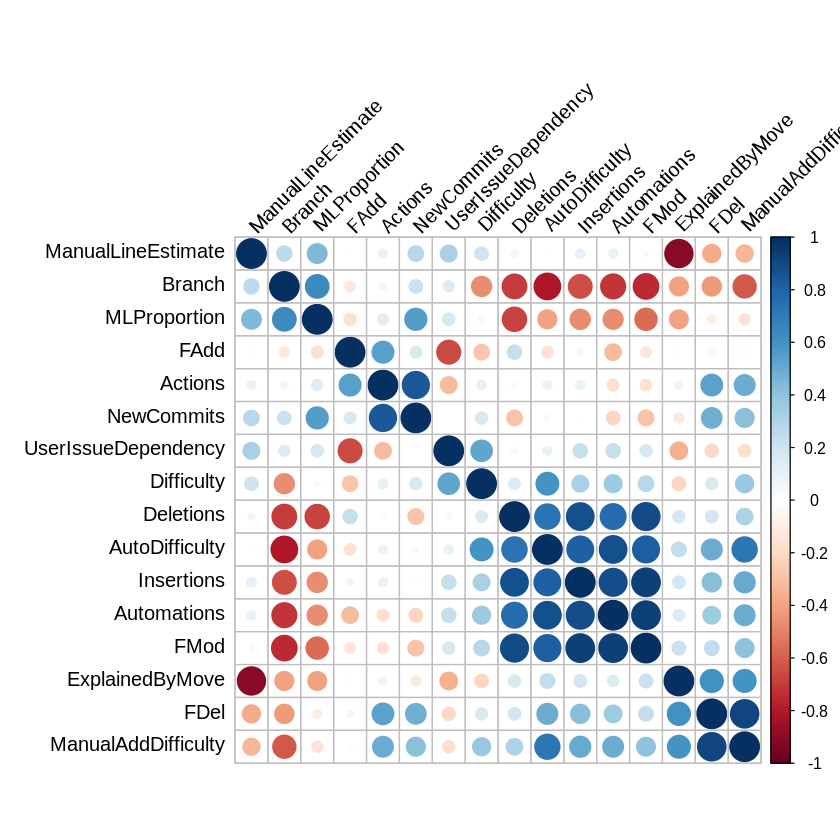

In [136]:
library(corrplot)
res <- cor(data)
corrplot(res, type = "full", order = "hclust", 
         tl.col = "black", tl.srt = 45)

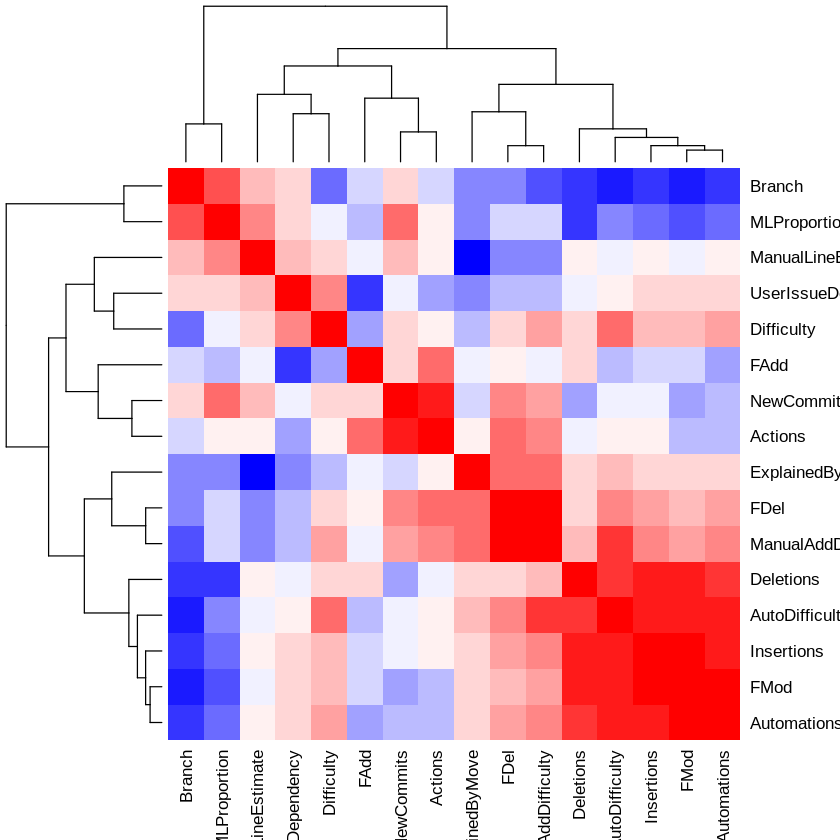

In [139]:
col<- colorRampPalette(c("blue", "white", "red"))(20)
heatmap(x = res, col = col, symm = TRUE)

    Branch Automations Insertions Deletions FMod AutoDifficulty
PC1  -0.35        0.35       0.35      0.33 0.36           0.37
    Actions NewCommits  FDel ManualAddDifficulty ExplainedByMove
PC2   -0.42      -0.33 -0.38               -0.32            -0.3
    UserIssueDependency
PC2                0.36
    NewCommits ExplainedByMove ManualLineEstimate MLProportion Difficulty
PC3       0.46           -0.32               0.41         0.36       0.35
    Deletions FAdd ExplainedByMove ManualLineEstimate
PC4      0.34 0.58           -0.31               0.37
    Branch Difficulty
PC5   0.37      -0.69


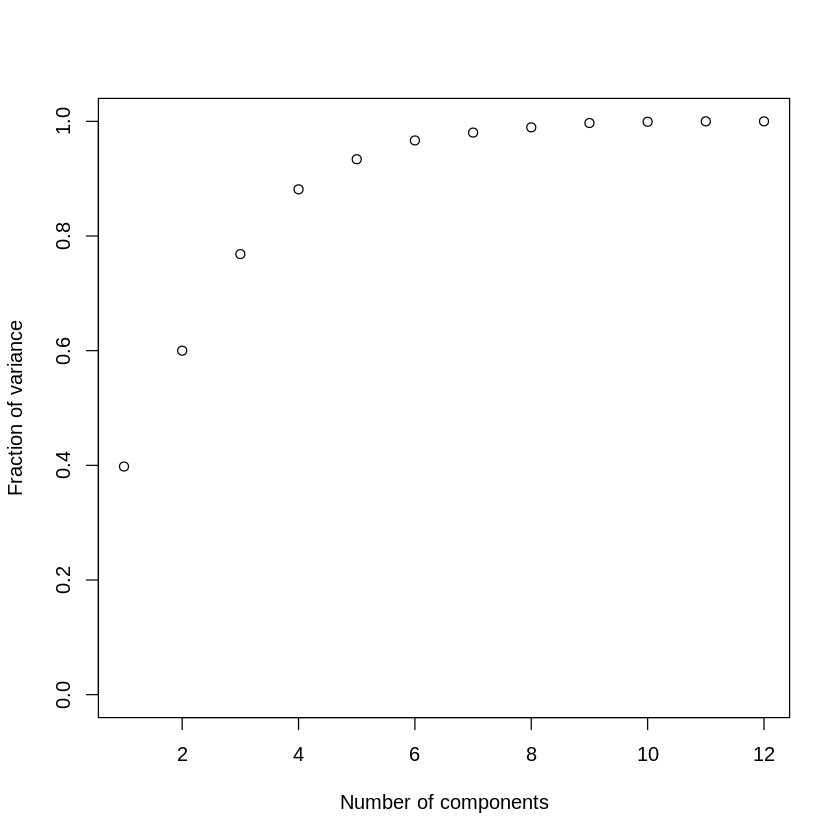

In [140]:
#PCA all variables
plot(1:12,cumsum(prcomp(vars, retx=F,scale=T)$sdev^2)/sum(prcomp(vars, retx=F,scale=T)$sdev^2),ylim=c(0,1),xlab="Number of components",ylab="Fraction of variance");
res<-prcomp(vars, retx=F,scale=T)$rotation[,1:5];
resAbs <- res;
resAbs[res<0] <- -res[res<0];
for (i in 1:5)
  print(t(res[resAbs[,i]>.3,i,drop=FALSE]));

    Branch Automations Insertions AutoDifficulty ManualAddDifficulty FDel
PC1   0.39       -0.41       -0.4          -0.45               -0.38 -0.3
     FAdd UserIssueDependency Difficulty  FDel
PC2 -0.54                0.64       0.31 -0.31
    Insertions FAdd ManualAddDifficulty  FDel
PC3       0.33 0.37               -0.46 -0.57
    Automations  FAdd Difficulty
PC4        0.34 -0.38      -0.75
    Branch Insertions FAdd UserIssueDependency
PC5   0.36       0.47 0.55                0.48


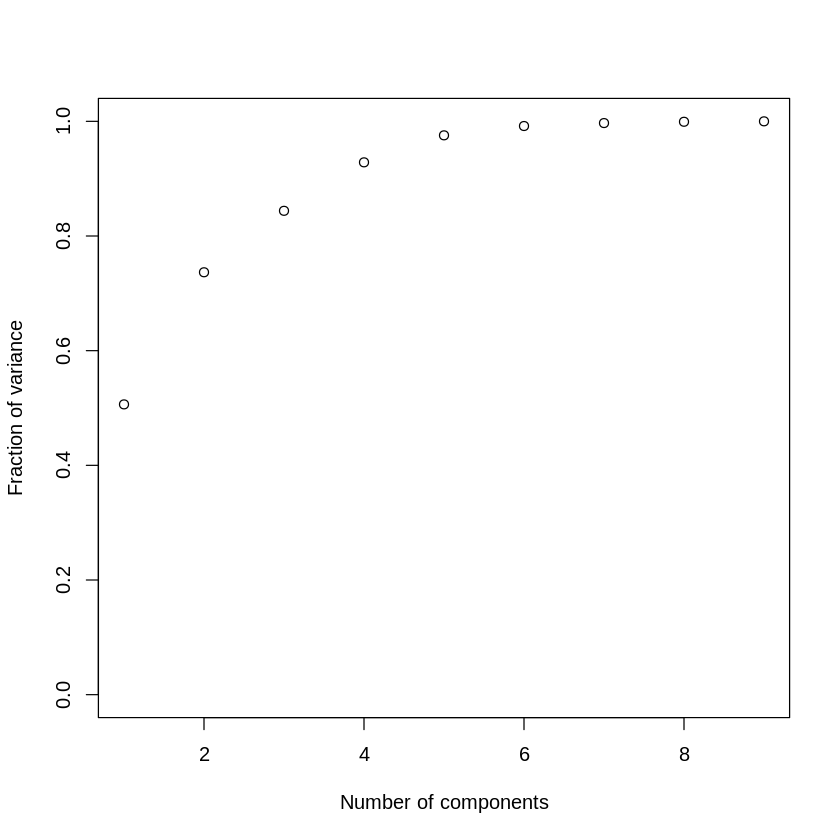

In [61]:
#PCA reduced set
data2 <- subset(data, select = c("Branch", "Automations", "Insertions", "FAdd", "AutoDifficulty", "ManualAddDifficulty", "UserIssueDependency", "Difficulty", "FDel"))

plot(1:9,cumsum(prcomp(data2, retx=F,scale=T)$sdev^2)/sum(prcomp(data2, retx=F,scale=T)$sdev^2),ylim=c(0,1),xlab="Number of components",ylab="Fraction of variance");
res<-prcomp(data2, retx=F,scale=T)$rotation[,1:5];
resAbs <- res;
resAbs[res<0] <- -res[res<0];
for (i in 1:5)
  print(t(res[resAbs[,i]>.3,i,drop=FALSE]));

In [142]:

res <- c();
vnam <- names(data2);
for (i in 2:dim(data2)[2]){
  fmla <- as.formula(paste(vnam[i],paste(vnam[-c(1,i)],collapse="+"),sep="~"));
  res <- rbind(res,c(i,round(summary(lm(fmla,data=data))$r.squared,2)));
}
row.names(res) <- vnam[res[,1]];
res[order(-res[,2]),];

AutoDifficulty,5,0.96
Insertions,3,0.95
Automations,2,0.94
UserIssueDependency,7,0.91
Difficulty,8,0.88
FAdd,4,0.84
ManualAddDifficulty,6,0.71


In [145]:
################LINEAR MODEL
fmla ~ Difficulty ~ Automations+Insertions+AutoDifficulty+UserIssueDependency+FAdd+ManualAddDifficulty

fmla ~ Difficulty ~ Automations + Insertions + AutoDifficulty + 
    UserIssueDependency + FAdd + ManualAddDifficulty

In [60]:
#LM
mod4 <- lm(Difficulty ~ Insertions+AutoDifficulty+UserIssueDependency + FAdd,data=data1);
summary(mod4); 


Call:
lm(formula = Difficulty ~ Insertions + AutoDifficulty + UserIssueDependency + 
    FAdd, data = data1)

Residuals:
    Min      1Q  Median      3Q     Max 
-0.9567 -0.1490  0.0879  0.2939  0.4533 

Coefficients:
                    Estimate Std. Error t value Pr(>|t|)    
(Intercept)            9.481      1.208    7.85  0.00010 ***
Insertions            -1.025      0.260   -3.94  0.00559 ** 
AutoDifficulty         5.720      1.035    5.53  0.00088 ***
UserIssueDependency    3.124      0.646    4.84  0.00188 ** 
FAdd                   1.011      0.380    2.66  0.03258 *  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.52 on 7 degrees of freedom
Multiple R-squared:  0.873,	Adjusted R-squared:  0.801 
F-statistic:   12 on 4 and 7 DF,  p-value: 0.00295


In [22]:
anova(mod4, test="Chi");

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
Automations,1,2.0273,2.0273,5.7020,0.063
Insertions,1,0.0017,0.0017,0.0046,0.948
AutoDifficulty,1,4.7082,4.7082,13.2424,0.015
UserIssueDependency,1,5.4899,5.4899,15.4410,0.011
FAdd,1,0.8612,0.8612,2.4223,0.180
ManualAddDifficulty,1,0.0507,0.0507,0.1426,0.721
Residuals,5,1.7777,0.3555,NA,NA


In [58]:
mod5 <- lm(Difficulty ~ Automations+FAdd+AutoDifficulty+UserIssueDependency,data=data);
summary(mod5); 
drop1(mod5)


Call:
lm(formula = Difficulty ~ Automations + FAdd + AutoDifficulty + 
    UserIssueDependency, data = data)

Residuals:
    Min      1Q  Median      3Q     Max 
-0.8229 -0.3861  0.0829  0.3582  0.9542 

Coefficients:
                    Estimate Std. Error t value Pr(>|t|)    
(Intercept)            5.449      0.583    9.34  3.3e-05 ***
Automations           -2.850      1.103   -2.58   0.0362 *  
FAdd                   0.147      0.457    0.32   0.7570    
AutoDifficulty         5.561      1.460    3.81   0.0066 ** 
UserIssueDependency    2.156      0.739    2.92   0.0224 *  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.67 on 7 degrees of freedom
Multiple R-squared:  0.791,	Adjusted R-squared:  0.672 
F-statistic: 6.62 on 4 and 7 DF,  p-value: 0.0157


,Df,Sum of Sq,RSS,AIC
<none>,NA,NA,3.1,-6.17
Automations,1,2.976,6.1,-0.13
FAdd,1,0.046,3.2,-8.00
AutoDifficulty,1,6.464,9.6,5.30
UserIssueDependency,1,3.796,6.9,1.38


In [27]:
anova(mod5, test="Chi");

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
Insertions,1,1.6,1.56,5.8,0.047
AutoDifficulty,1,4.8,4.79,17.7,0.004
UserIssueDependency,1,4.8,4.77,17.6,0.004
FAdd,1,1.9,1.91,7.1,0.033
Residuals,7,1.9,0.27,NA,NA


In [17]:
#Alternative sums of squares for ANOVA
#Based on residuals of remaining predictors
drop1(mod4, test="Chi");

,Df,Sum of Sq,RSS,AIC,Pr(>Chi)
<none>,NA,NA,1.8,-8.9,NA
Automations,1,0.011,1.8,-10.8,0.78399
Insertions,1,1.300,3.1,-4.3,0.01028
AutoDifficulty,1,3.247,5.0,1.6,0.00041
UserIssueDependency,1,4.317,6.1,3.9,0.00012
FAdd,1,0.879,2.7,-6.1,0.02811
ManualAddDifficulty,1,0.051,1.8,-10.6,0.56131


In [18]:
#Variance Inflation Factor
library(car)
vif(mod4);

Automations          Insertions      AutoDifficulty UserIssueDependency 
               15.5                10.7                 8.8                 3.3 
               FAdd ManualAddDifficulty 
                4.2                 3.3

In [ ]:
#################Scratch Work Below

In [179]:
#cols <- c("Actions","NewCommits")
#acme[cols] <- scale(acme[cols])
#acme[cols]
normalize <- function(x) {
    return ((x - min(x)) / (max(x) - min(x)))
}

acmeNorm <- as.data.frame(lapply(acme, normalize))

acmeNorm
corAN = cor(acmeNorm)
corAN

Branch,Actions,NewCommits,Automations,Insertions,Deletions,FilesModified,FilesDeleted,FilesAdded,AutomationDifficulty,ManualAddDifficulty,AddDelEqMoved,ManualLineEstimate,ManualLineProp,Dependency_UserIssue,Difficulty
0.000,1.0,0.67,0.5,0.881,1.000,1.000,0.5,1.00,1.00,1.0,0,1.000,0.091,0,1.00
0.091,0.2,0.00,0.5,0.555,0.304,0.802,1.0,0.50,0.50,0.8,1,0.000,0.000,0,0.33
0.182,0.2,0.00,0.5,0.110,0.079,0.377,0.5,0.00,0.50,0.8,1,0.000,0.000,0,0.33
0.273,0.2,0.00,0.5,0.696,0.375,0.962,0.5,0.00,1.00,1.0,1,0.000,0.000,1,1.00
0.364,0.4,0.33,1.0,1.000,0.279,0.764,1.0,0.00,1.00,1.0,0,0.531,0.087,1,1.00
0.455,0.2,0.00,0.0,0.000,0.027,0.019,0.0,0.25,0.00,0.0,0,0.031,0.068,1,1.00
0.545,0.2,0.00,0.5,0.625,0.375,0.962,0.0,0.25,0.25,0.0,0,0.350,0.065,1,0.33
0.636,0.0,0.00,0.5,0.625,0.375,0.962,0.0,0.00,0.25,0.0,0,0.350,0.065,1,0.33
0.727,1.0,0.67,0.0,0.148,0.098,0.038,1.0,0.75,0.00,0.6,1,0.000,0.000,0,0.00
0.818,0.2,0.00,0.0,0.000,0.027,0.019,0.0,0.25,0.00,0.0,0,0.031,0.068,0,0.33


,Branch,Actions,NewCommits,Automations,Insertions,Deletions,FilesModified,FilesDeleted,FilesAdded,AutomationDifficulty,ManualAddDifficulty,AddDelEqMoved,ManualLineEstimate,ManualLineProp,Dependency_UserIssue,Difficulty
Branch,1.000,-0.061,2.1e-01,-0.658,-0.6154,-0.643,-0.663,-0.393,-0.207,-7.8e-01,-0.69,-0.410,-0.159,0.636,1.4e-01,-0.466
Actions,-0.061,1.000,8.4e-01,-0.142,0.0951,0.355,-0.121,0.508,0.676,1.3e-01,0.44,0.075,0.425,0.139,-3.2e-01,0.103
NewCommits,0.211,0.843,1.0e+00,-0.173,0.0034,0.144,-0.209,0.440,0.296,-1.3e-17,0.32,-0.115,0.427,0.555,1.4e-17,0.170
Automations,-0.658,-0.142,-1.7e-01,1.000,0.8799,0.530,0.821,0.390,-0.244,8.3e-01,0.58,0.094,0.344,-0.427,2.7e-01,0.400
Insertions,-0.615,0.095,3.4e-03,0.880,1.0000,0.785,0.913,0.354,0.047,8.4e-01,0.56,-0.022,0.539,-0.396,2.9e-01,0.477
Deletions,-0.643,0.355,1.4e-01,0.530,0.7855,1.000,0.789,0.122,0.475,7.0e-01,0.45,-0.095,0.724,-0.316,-4.4e-02,0.404
FilesModified,-0.663,-0.121,-2.1e-01,0.821,0.9131,0.789,1.000,0.148,-0.024,7.6e-01,0.42,0.084,0.396,-0.456,2.7e-01,0.343
FilesDeleted,-0.393,0.508,4.4e-01,0.390,0.3541,0.122,0.148,1.000,0.190,4.5e-01,0.81,0.590,-0.038,-0.135,-2.1e-01,0.109
FilesAdded,-0.207,0.676,3.0e-01,-0.244,0.0475,0.475,-0.024,0.190,1.000,0.0e+00,0.13,0.046,0.367,-0.156,-6.5e-01,-0.185
AutomationDifficulty,-0.781,0.132,-1.3e-17,0.831,0.8443,0.702,0.759,0.454,0.000,1.0e+00,0.83,0.220,0.408,-0.381,1.0e-01,0.628


Importance of components:
                       Comp.1 Comp.2 Comp.3 Comp.4 Comp.5 Comp.6 Comp.7  Comp.8
Standard deviation       2.86   1.97   1.59  1.021  0.454 0.3050 0.1922 0.10288
Proportion of Variance   0.51   0.24   0.16  0.065  0.013 0.0058 0.0023 0.00066
Cumulative Proportion    0.51   0.75   0.91  0.978  0.991 0.9968 0.9991 0.99974
                        Comp.9 Comp.10 Comp.11 Comp.12 Comp.13 Comp.14 Comp.15
Standard deviation     0.05522 3.3e-02 5.3e-03 1.3e-08 7.4e-09       0       0
Proportion of Variance 0.00019 6.7e-05 1.7e-06 1.1e-17 3.4e-18       0       0
Cumulative Proportion  0.99993 1.0e+00 1.0e+00 1.0e+00 1.0e+00       1       1
                       Comp.16
Standard deviation           0
Proportion of Variance       0
Cumulative Proportion        1


Loadings:
                     Comp.1 Comp.2 Comp.3 Comp.4 Comp.5 Comp.6 Comp.7 Comp.8
Branch               -0.341                      -0.217 -0.156         0.278
Actions                      0.445 -0.256  0.164  0.130 -0.318         0.348
NewCommits           -0.180  0.281 -0.290  0.444 -0.129 -0.201  0.238  0.123
Automations           0.335 -0.112               -0.355        -0.230       
Insertions            0.337        -0.115        -0.227 -0.225              
Deletions             0.297        -0.291 -0.202                0.387       
FilesModified         0.333 -0.115        -0.141 -0.189 -0.171  0.389 -0.103
FilesDeleted          0.175  0.348  0.218  0.352 -0.301 -0.139 -0.349 -0.453
FilesAdded                   0.425 -0.245 -0.350  0.241 -0.124        -0.491
AutomationDifficulty  0.347                              0.240         0.252
ManualAddDifficulty   0.290  0.225  0.101  0.281         0.280         0.172
AddDelEqMoved         0.138  0.270  0.465                       0

,Comp.1,Comp.2,Comp.3,Comp.4,Comp.5,Comp.6,Comp.7,Comp.8,Comp.9,Comp.10,Comp.11,Comp.12,Comp.13,Comp.14,Comp.15,Comp.16
Branch,-6.612,-1.83,1.07,-1.03,-0.184,-0.051,-0.23341,0.165,-0.0696,0.0335,0.00164,-1.8e-14,6.5e-14,-9.5e-15,-2.2e-14,1.5e-14
Actions,-1.446,3.11,-1.25,0.51,0.202,-0.392,-0.00044,0.134,0.0144,-0.0352,-0.00903,5.1e-14,-3.3e-13,2.3e-14,1.0e-13,-6.0e-14
NewCommits,-2.510,1.84,-1.43,1.58,-0.237,-0.290,0.19556,0.048,0.0297,0.0438,0.00138,-9.2e-15,6.4e-14,6.9e-16,-1.4e-14,1.9e-14
Automations,2.963,-1.51,0.77,-0.20,-0.602,0.085,-0.29079,0.052,0.1268,0.0147,-0.00677,4.3e-14,-2.3e-13,2.7e-14,8.1e-14,-3.6e-14
Insertions,3.087,-0.94,-0.50,-0.26,-0.399,-0.302,-0.05769,-0.056,-0.1016,-0.0062,-0.00035,-7.0e-15,-1.7e-14,-7.5e-15,-2.0e-15,-4.4e-15
Deletions,2.280,0.28,-1.66,-1.14,0.184,-0.018,0.26447,0.023,-0.0096,0.0360,0.00589,-3.5e-14,2.2e-13,-1.4e-14,-6.6e-14,4.2e-14
FilesModified,2.900,-1.54,0.20,-1.09,-0.273,-0.178,0.29221,-0.038,-0.0031,0.0348,-0.00621,2.5e-14,-2.1e-13,1.8e-14,6.3e-14,-2.6e-14
FilesDeleted,0.603,2.34,1.69,1.12,-0.471,-0.183,-0.24524,-0.186,-0.0212,0.0210,0.00568,-3.2e-14,2.1e-13,-1.6e-14,-6.4e-14,3.8e-14
FilesAdded,-1.462,2.77,-0.69,-2.14,0.569,-0.022,-0.18851,-0.165,0.0055,-0.0169,-0.00330,1.9e-14,-1.2e-13,7.9e-15,3.5e-14,-2.2e-14
AutomationDifficulty,3.354,-0.29,0.18,0.27,0.082,0.369,-0.03701,0.112,-0.0822,-0.0344,-0.00244,7.1e-15,-1.0e-13,-1.5e-15,2.3e-14,-2.6e-14


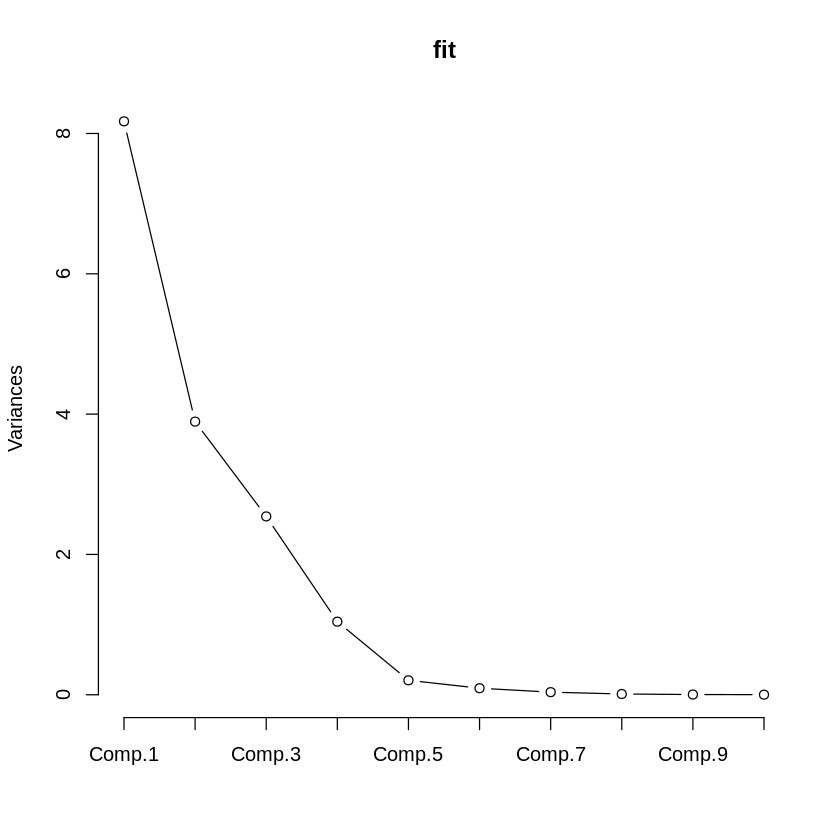

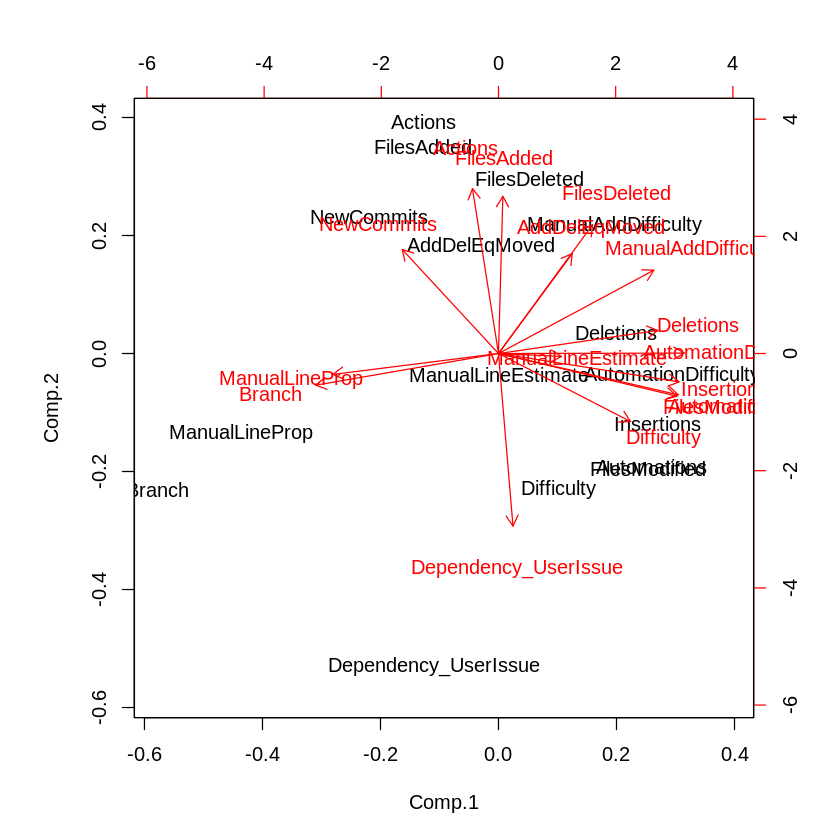

In [156]:
#PCA based on correlation matrix
# Pricipal Components Analysis
# entering raw data and extracting PCs 
# from the correlation matrix 
fit <- princomp(corAN, cor=TRUE)
summary(fit) # print variance accounted for 
loadings(fit) # pc loadings 
plot(fit,type="lines") # scree plot 
fit$scores # the principal components
biplot(fit)

In [184]:
colnames(acmeNorm)
mod <- glm(Difficulty ~ Automations+Insertions+AutomationDifficulty+Dependency_UserIssue+FilesAdded+ManualAddDifficulty,family=gaussian,data=acmeNorm);
summary(mod); 

[1] "Branch"               "Actions"              "NewCommits"          
 [4] "Automations"          "Insertions"           "Deletions"           
 [7] "FilesModified"        "FilesDeleted"         "FilesAdded"          
[10] "AutomationDifficulty" "ManualAddDifficulty"  "AddDelEqMoved"       
[13] "ManualLineEstimate"   "ManualLineProp"       "Dependency_UserIssue"
[16] "Difficulty"


Call:
glm(formula = Difficulty ~ Automations + Insertions + AutomationDifficulty + 
    Dependency_UserIssue + FilesAdded + ManualAddDifficulty, 
    family = gaussian, data = acmeNorm)

Deviance Residuals: 
       1         2         3         4         5         6         7         8  
 0.11299   0.09922  -0.08319  -0.20280   0.12669   0.17017  -0.17017  -0.00944  
       9        10        11        12  
-0.13989   0.25247  -0.24160   0.08555  

Coefficients:
                     Estimate Std. Error t value Pr(>|t|)  
(Intercept)           -0.0799     0.2887   -0.28    0.793  
Automations            0.0302     0.8306    0.04    0.972  
Insertions            -1.1332     0.8637   -1.31    0.247  
AutomationDifficulty   1.4659     0.5804    2.53    0.053 .
Dependency_UserIssue   0.7490     0.2971    2.52    0.053 .
FilesAdded             0.6430     0.5464    1.18    0.292  
ManualAddDifficulty   -0.1587     0.3515   -0.45    0.671  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05

In [185]:
mod <- glm(Difficulty ~ Automations+Insertions+AutomationDifficulty+Dependency_UserIssue,family=gaussian,data=acmeNorm);
summary(mod); 


Call:
glm(formula = Difficulty ~ Automations + Insertions + AutomationDifficulty + 
    Dependency_UserIssue, family = gaussian, data = acmeNorm)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-0.3050  -0.1098  -0.0234   0.1410   0.3395  

Coefficients:
                     Estimate Std. Error t value Pr(>|t|)  
(Intercept)             0.193      0.112    1.73    0.127  
Automations            -0.739      0.488   -1.52    0.173  
Insertions             -0.258      0.446   -0.58    0.581  
AutomationDifficulty    1.194      0.349    3.42    0.011 *
Dependency_UserIssue    0.467      0.148    3.17    0.016 *
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for gaussian family taken to be 0.054)

    Null deviance: 1.6574  on 11  degrees of freedom
Residual deviance: 0.3786  on  7  degrees of freedom
AIC: 4.58

Number of Fisher Scoring iterations: 2


In [157]:
acmeNorm.pca <- prcomp(acmeNorm,
                 center = TRUE,
                 scale. = TRUE) 
summary(acmeNorm.pca)
#1st row, standard deviation associated with each PC
#2nd row, proportion of variance in data explained by each component 
#3rd row, cumulative proportion of explained variance

#PC1,PC2, PC3, PC4

Importance of components:
                         PC1   PC2   PC3   PC4    PC5    PC6    PC7    PC8
Standard deviation     2.508 1.782 1.656 1.344 0.8704 0.7133 0.5959 0.4065
Proportion of Variance 0.393 0.199 0.171 0.113 0.0473 0.0318 0.0222 0.0103
Cumulative Proportion  0.393 0.592 0.763 0.876 0.9234 0.9553 0.9775 0.9878
                           PC9    PC10    PC11     PC12
Standard deviation     0.36117 0.23820 0.09164 9.54e-17
Proportion of Variance 0.00815 0.00355 0.00052 0.00e+00
Cumulative Proportion  0.99593 0.99948 1.00000 1.00e+00

In [158]:
predict(acmeNorm.pca, 
        newdata=tail(acmeNorm, 2))

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12
11,-3.1,0.48,0.46,1.3,-0.62,-1.06,0.085,0.17,0.51,0.36,-0.044,1.1e-16
12,-2.5,1.74,2.34,-2.6,-0.27,-0.24,0.622,0.13,-0.21,-0.15,0.029,-2.8e-16


In [159]:
myPCA <- prcomp(acmeNorm, scale. = F, center = F)
myPCA

Standard deviations:
 [1] 1.765 0.763 0.714 0.565 0.418 0.310 0.253 0.217 0.143 0.093 0.088 0.031

Rotation:
                       PC1    PC2      PC3    PC4    PC5     PC6    PC7    PC8
Branch               -0.21  0.407 -0.40681 -0.187 -0.443  0.0808 -0.376  0.237
Actions              -0.22 -0.036 -0.36697  0.231  0.037 -0.1059  0.294  0.022
NewCommits           -0.15  0.081 -0.35509  0.186  0.323  0.2232  0.315 -0.308
Automations          -0.24 -0.049  0.23412 -0.035 -0.039  0.3133 -0.153  0.276
Insertions           -0.29 -0.026  0.24142  0.133 -0.110  0.2259  0.146  0.158
Deletions            -0.18 -0.047  0.10029  0.292 -0.154 -0.1197  0.078 -0.254
FilesModified        -0.35 -0.029  0.34078  0.061 -0.399  0.1289  0.100 -0.327
FilesDeleted         -0.28 -0.260 -0.24584 -0.167  0.183  0.3544  0.177  0.417
FilesAdded           -0.16 -0.113 -0.27010  0.344 -0.376 -0.3392  0.121  0.187
AutomationDifficulty -0.29 -0.167  0.23439  0.071  0.167 -0.0481 -0.324 -0.029
ManualAddDifficulty  -

In [160]:
sub1 <- subset(acmeNorm, select = c("Branch", "NewCommits", "Automations", "Insertions", "Deletions", "FilesModified", "AutomationDifficulty", "ManualAddDifficulty", "ManualLineEstimate", "Dependency_UserIssue", "Difficulty"))
sub1
#cor(sub1)

Branch,NewCommits,Automations,Insertions,Deletions,FilesModified,AutomationDifficulty,ManualAddDifficulty,ManualLineEstimate,Dependency_UserIssue,Difficulty
0.000,0.67,0.5,0.881,1.000,1.000,1.00,1.0,1.000,0,1.00
0.091,0.00,0.5,0.555,0.304,0.802,0.50,0.8,0.000,0,0.33
0.182,0.00,0.5,0.110,0.079,0.377,0.50,0.8,0.000,0,0.33
0.273,0.00,0.5,0.696,0.375,0.962,1.00,1.0,0.000,1,1.00
0.364,0.33,1.0,1.000,0.279,0.764,1.00,1.0,0.531,1,1.00
0.455,0.00,0.0,0.000,0.027,0.019,0.00,0.0,0.031,1,1.00
0.545,0.00,0.5,0.625,0.375,0.962,0.25,0.0,0.350,1,0.33
0.636,0.00,0.5,0.625,0.375,0.962,0.25,0.0,0.350,1,0.33
0.727,0.67,0.0,0.148,0.098,0.038,0.00,0.6,0.000,0,0.00
0.818,0.00,0.0,0.000,0.027,0.019,0.00,0.0,0.031,0,0.33



Call:
lm(formula = Difficulty ~ Branch + Insertions + Deletions, data = sub2)

Residuals:
    Min      1Q  Median      3Q     Max 
-0.3877 -0.2559 -0.0921  0.2380  0.5763 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)
(Intercept)   0.5804     0.3815    1.52     0.17
Branch       -0.3411     0.4785   -0.71     0.50
Insertions    0.3418     0.5131    0.67     0.52
Deletions    -0.0591     0.7137   -0.08     0.94

Residual standard error: 0.39 on 8 degrees of freedom
Multiple R-squared:  0.276,	Adjusted R-squared:  0.00395 
F-statistic: 1.01 on 3 and 8 DF,  p-value: 0.435


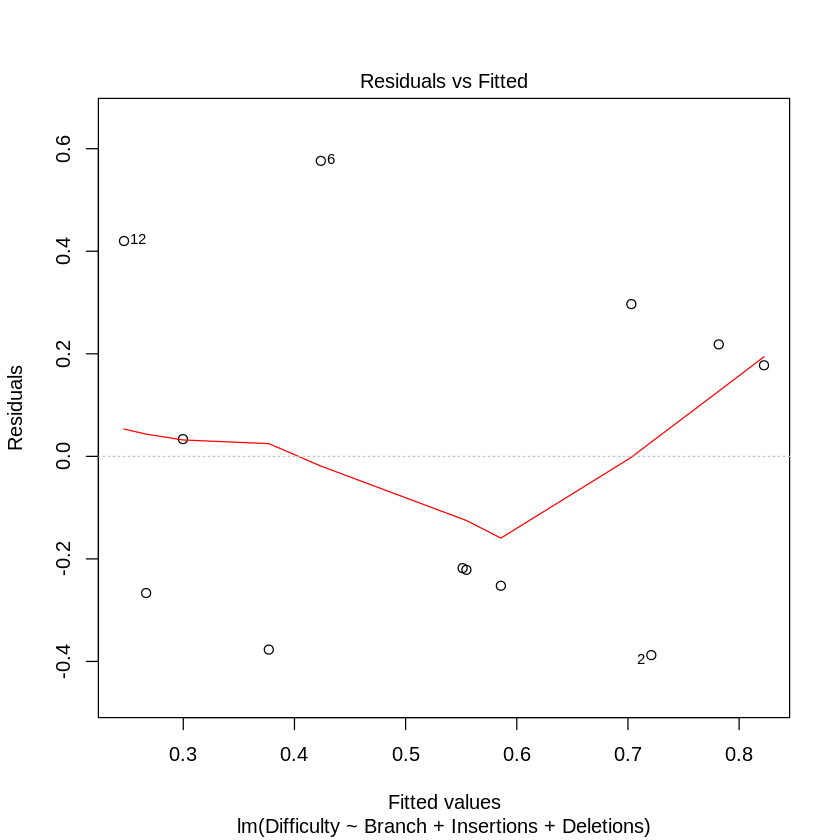

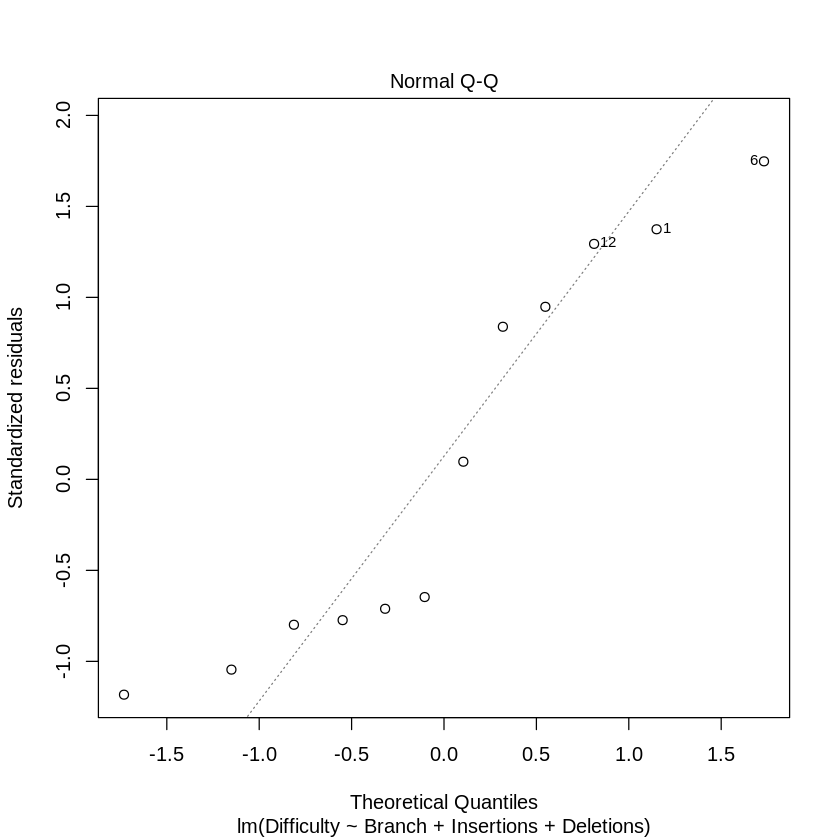

In [161]:
sub2 <- subset(acmeNorm, select = c("Branch", "Insertions", "Deletions", "FilesModified", "AutomationDifficulty", "ManualAddDifficulty", "ManualLineEstimate", "Dependency_UserIssue", "Difficulty"))
#sub2
subset.mod <- lm(Difficulty ~ Branch + Insertions + Deletions, data=sub2)
summary(subset.mod)
plot(subset.mod, which = c(1,2))

#Formula call -> predictor and target response variables with the data being used
#

Importance of components:
                       Comp.1 Comp.2 Comp.3 Comp.4 Comp.5  Comp.6  Comp.7
Standard deviation       2.55   1.16  0.865  0.585 0.1725 0.05608 0.03579
Proportion of Variance   0.72   0.15  0.083  0.038 0.0033 0.00035 0.00014
Cumulative Proportion    0.72   0.87  0.958  0.996 0.9995 0.99983 0.99998
                        Comp.8  Comp.9
Standard deviation     1.5e-02 6.0e-09
Proportion of Variance 2.3e-05 3.9e-18
Cumulative Proportion  1.0e+00 1.0e+00


Loadings:
                     Comp.1 Comp.2 Comp.3 Comp.4 Comp.5 Comp.6 Comp.7 Comp.8
Branch                0.384        -0.208        -0.326  0.266  0.299 -0.561
Insertions           -0.381        -0.107  0.322 -0.293  0.392  0.618  0.284
Deletions            -0.374 -0.151 -0.248         0.455 -0.341  0.342 -0.549
FilesModified        -0.368        -0.138  0.523  0.148        -0.308       
AutomationDifficulty -0.385         0.186        -0.221  0.454 -0.467 -0.498
ManualAddDifficulty  -0.351         0.487 -0.159 -0.514 -0.517  0.144       
ManualLineEstimate   -0.265 -0.295 -0.701 -0.400 -0.328        -0.218  0.169
Dependency_UserIssue  0.101  0.793 -0.314  0.168 -0.245 -0.342        -0.103
Difficulty           -0.284  0.494        -0.634  0.314  0.250  0.153       
                     Comp.9
Branch                0.475
Insertions           -0.180
Deletions            -0.171
FilesModified         0.665
AutomationDifficulty -0.304
ManualAddDifficulty   0.236
ManualLineEstimate     

,Comp.1,Comp.2,Comp.3,Comp.4,Comp.5,Comp.6,Comp.7,Comp.8,Comp.9
Branch,6.41,-1.081,0.29,0.151,0.055,0.0406,0.0059,0.00045,-1.1e-15
Insertions,-1.77,0.153,-0.31,0.540,-0.194,0.0583,0.0723,0.00445,4.2e-15
Deletions,-1.69,-1.055,-0.56,0.047,0.301,-0.0493,0.0292,-0.01959,3.6e-15
FilesModified,-1.42,0.059,-0.16,1.021,0.143,-0.0034,-0.0450,0.02220,-7.2e-15
AutomationDifficulty,-1.95,-0.006,0.70,-0.027,-0.074,0.0830,-0.0483,-0.02329,5.0e-16
ManualAddDifficulty,-0.94,-0.740,1.79,-0.233,-0.128,-0.0829,0.0086,0.00700,7.5e-16
ManualLineEstimate,-0.35,-1.203,-1.51,-0.721,-0.201,-0.0187,-0.0278,0.00736,-1.0e-15
Dependency_UserIssue,2.14,2.351,-0.44,0.261,-0.107,-0.0701,-0.0073,-0.01263,2.6e-15
Difficulty,-0.42,1.523,0.22,-1.039,0.205,0.0424,0.0123,0.01406,-2.9e-15


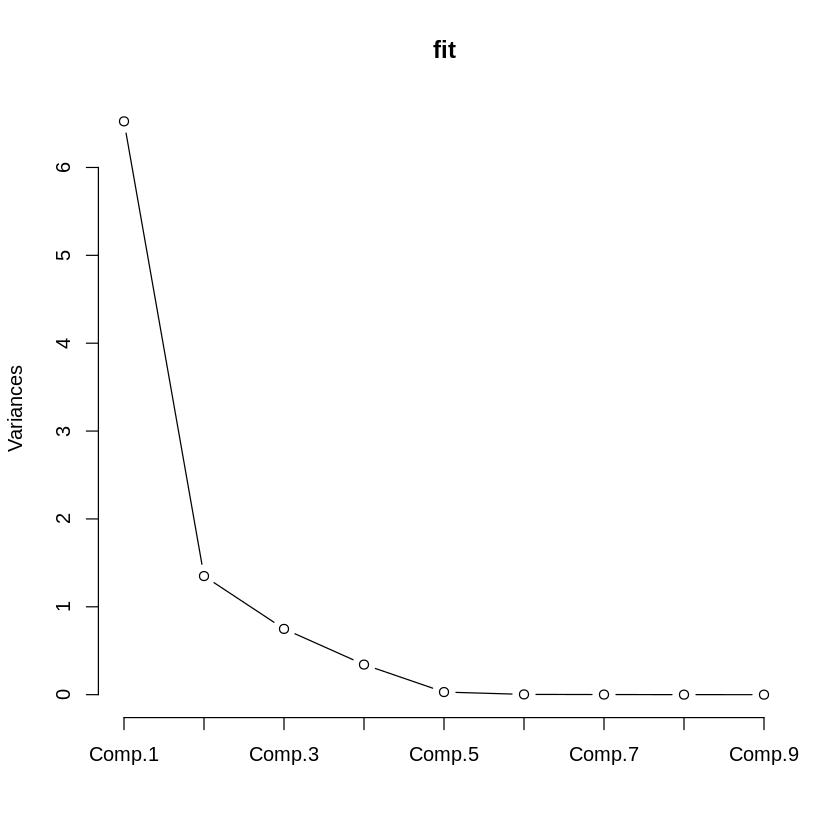

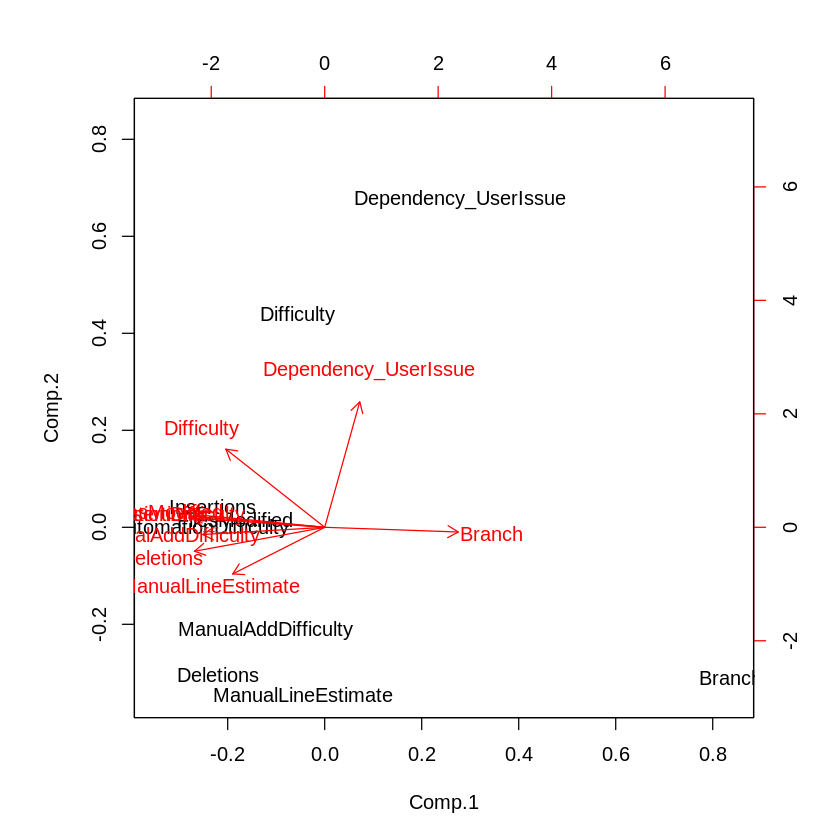

In [162]:
########### PCA with subset 
corSub2 = cor(sub2)
fit <- princomp(corSub2, cor=TRUE)
summary(fit) # print variance accounted for 
loadings(fit) # pc loadings 
plot(fit,type="lines") # scree plot 
fit$scores # the principal components
biplot(fit)

In [163]:
sub2.pca <- prcomp(sub2,
                 center = TRUE,
                 scale. = TRUE) 
summary(sub2.pca)

Importance of components:
                        PC1   PC2   PC3    PC4    PC5     PC6     PC7     PC8
Standard deviation     2.26 1.203 1.062 0.8447 0.6063 0.29495 0.27221 0.21383
Proportion of Variance 0.57 0.161 0.125 0.0793 0.0408 0.00967 0.00823 0.00508
Cumulative Proportion  0.57 0.731 0.856 0.9352 0.9760 0.98572 0.99395 0.99903
                           PC9
Standard deviation     0.09326
Proportion of Variance 0.00097
Cumulative Proportion  1.00000

In [164]:
myPCA2 <- prcomp(acmeNorm, scale. = F, center = F)
summary(myPCA2)

Importance of components:
                        PC1   PC2   PC3    PC4    PC5    PC6   PC7     PC8
Standard deviation     1.76 0.763 0.714 0.5652 0.4176 0.3100 0.253 0.21749
Proportion of Variance 0.63 0.118 0.103 0.0646 0.0353 0.0194 0.013 0.00957
Cumulative Proportion  0.63 0.747 0.851 0.9151 0.9504 0.9698 0.983 0.99235
                           PC9    PC10    PC11    PC12
Standard deviation     0.14316 0.09331 0.08773 0.03072
Proportion of Variance 0.00414 0.00176 0.00156 0.00019
Cumulative Proportion  0.99649 0.99825 0.99981 1.00000

In [ ]:
#Add variables
#use of variable before hand, indicator has it been used as
#missign instances where it should have been changed

# Summary
# Log transform
# identify skewed data
# principle components
# look at correlations
# subset of best fit to model
# max of 3 or 4
# look at model
# colnames(acme)
library(PerformanceAnalytics)
options(warn=-1)
chart.Correlation(acmeNorm[,2:9],col=acmeNorm$Difficulty)

In [ ]:
chart.Correlation(acmeNorm[,10:16],col=acmeNorm$Difficulty)

In [ ]:
#max(acme$Actions)
#min(acme$Actions)
#length(acme$Actions)
#plot(density(acme$Actions))
#new2 <- normalized(acme)
#new1 <- scale(new2)
#cols <- c("Actions","NewCommits")
#acme[cols] <- scale(acme[cols])
#acme[cols]

In [ ]:
sub <- subset(acme, select = c("Branch", "Actions", "NewCommits", "Automations", "Insertions", "Deletions", "FilesModified", "FilesDeleted", "FilesAdded", "AddDifficulty", "ManualLineEstimate", "Difficulty"))
sub
cor(sub)

Branch Order - -.465515
Automations - .3995
Insertions - .47674
Deletions - .40415
FilesModified - .34336
AddDifficulty - .4435731      .3687
ManualLineEstimate -.37603

In [ ]:
###############OLD SCRATCH WORK#################################################




subset <- subset(acme, select = c("Branch","Automations", "Insertions", "Deletions", "FilesModified", "AddDifficulty", "ManualLineEstimate", "Difficulty"))
subset
subset.mod <- lm(Difficulty ~ AddDifficulty + Insertions + Automations, data=acme)
summary(subset.mod)
plot(subset.mod, which = c(1,2))

In [ ]:
subset.mod2 <- lm(Difficulty ~ Automations + Insertions + Deletions + FilesModified + AddDifficulty + ManualLineEstimate, data=acme)
summary(subset.mod2)
plot(subset.mod2, which = c(1,2))

In [ ]:
sub1 <- subset(acme, select = c("Branch", "Actions", "NewCommits", "Automations", "Difficulty"))
sub1
cor(sub1)

In [ ]:
sub2 <- subset(acme, select = c("Branch", "Insertions", "Deletions", "FilesModified", "FilesDeleted", "FilesAdded", "Difficulty"))
sub2
cor(sub2)

In [ ]:
plot(sub2)

In [ ]:
sub2.mod <- lm(Difficulty ~ Insertions, data=acme)
summary(sub2.mod)

In [ ]:
plot(sub2.mod, which = c(1,2))

In [ ]:
sub2.mod2 <- lm(Difficulty ~ Insertions + Deletions + FilesModified, data=acme)
summary(sub2.mod2)
plot(sub2.mod2, which = c(1,2))

In [ ]:
matplot(acme[, 1], acme[, -1])


In [ ]:
model<-lm(acme$Difficulty~acme$Actions + acme$NewCommits + acme$Automations)
plot(model)

In [ ]:
create_model <- function(acme,target) {
set.seed(120)
myglm <- glm(target ~ . , data=trainData, family = "binomial")
return(myglm) }

In [ ]:
regmodel <- lm(Difficulty ~ Actions, data = acme)
regmodel
plot(regmodel)

In [ ]:
plot(acme$Difficulty,acme$ManualLineProportion)
cor(acme$Difficulty,acme$ManualLineProportion)